In [103]:
import pandas as pd
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [104]:
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [106]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

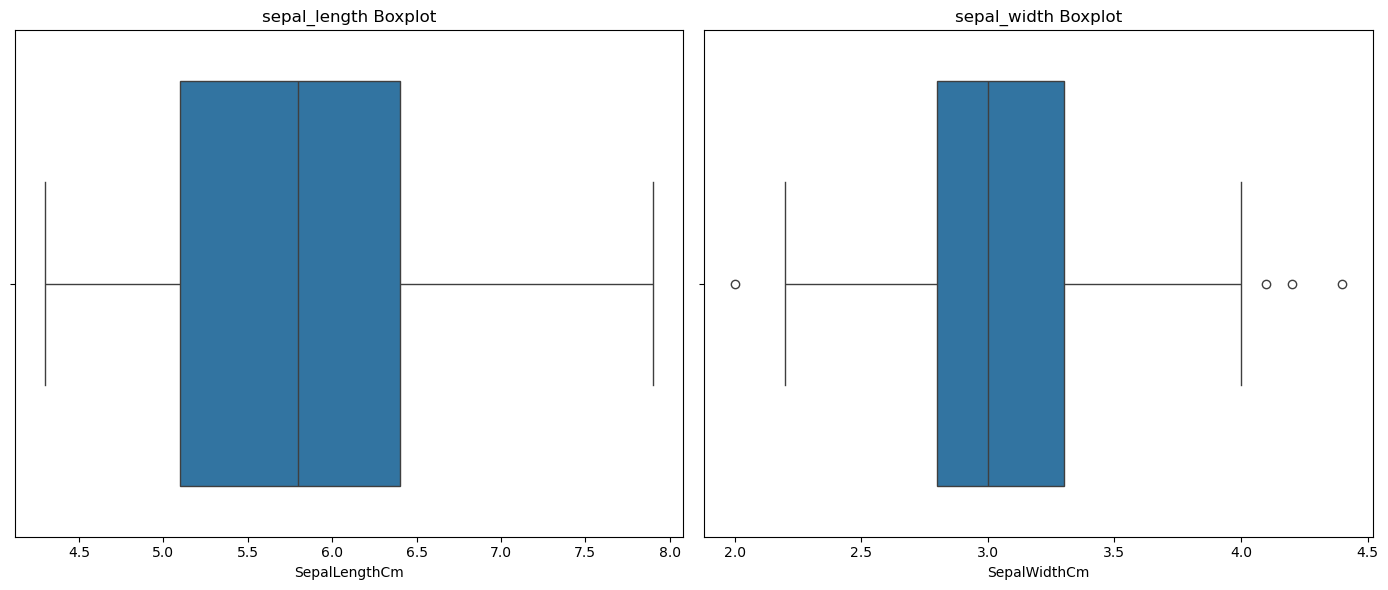

In [107]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

#Plot for petal_length
plt.subplot(1,2,1)
sns.boxplot(x=df['SepalLengthCm'])
plt.title("sepal_length Boxplot")

#Plot for petal_witdh
plt.subplot(1,2,2)
sns.boxplot(x=df['SepalWidthCm'])
plt.title("sepal_width Boxplot")


plt.tight_layout()#it Removes overlapping of two subplot
plt.show() #shows boxplot

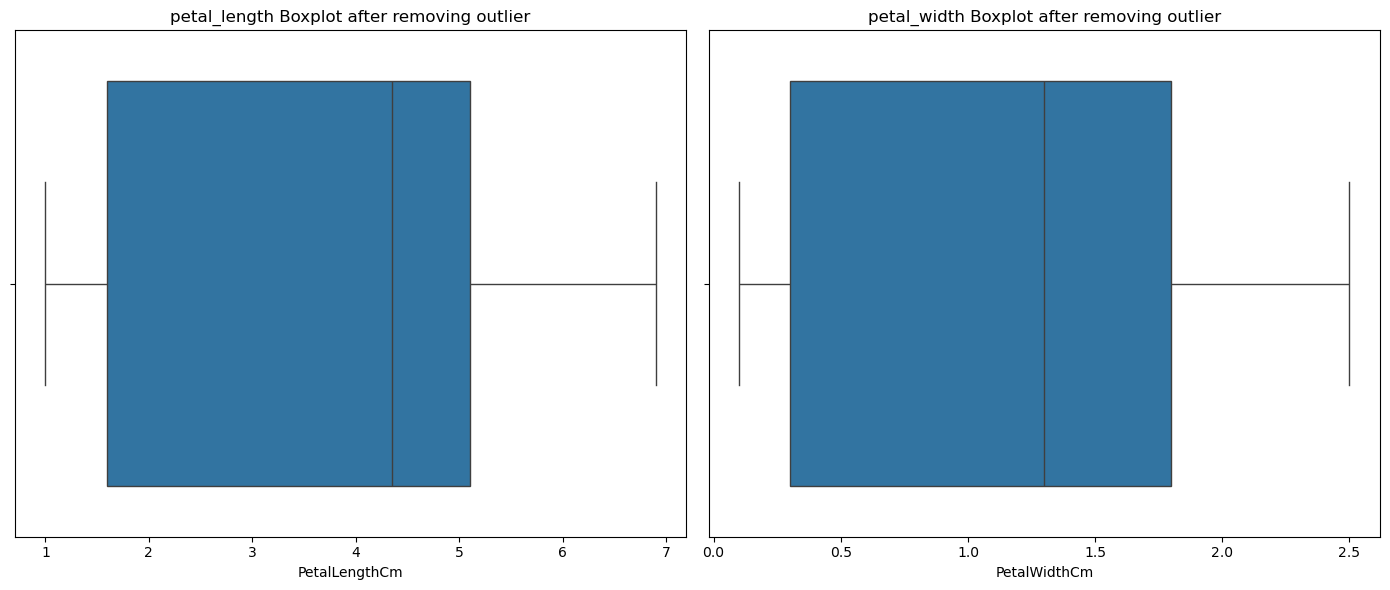

In [108]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

#Plot for petal_length
plt.subplot(1,2,1)
sns.boxplot(x=df['PetalLengthCm'])
plt.title("petal_length Boxplot after removing outlier")

#Plot for petal_witdh
plt.subplot(1,2,2)
sns.boxplot(x=df['PetalWidthCm'])
plt.title("petal_width Boxplot after removing outlier")


plt.tight_layout()#it Removes overlapping of two subplot
plt.show() #shows boxplot

In [109]:
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR = Q3-Q1


#Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 * IQR

#Filter the data that falls outside the bound
outliers = df[(df['SepalWidthCm'] < lower_bound) | (df['SepalWidthCm'] > upper_bound)]

#display outliers
outliers

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor


In [110]:
#Impute outliers with the median salary

median_sepal_width=df['SepalWidthCm'].median()
df['SepalWidthCm']= df['SepalWidthCm'].apply(lambda x: median_sepal_width if x < lower_bound or x > upper_bound else x)

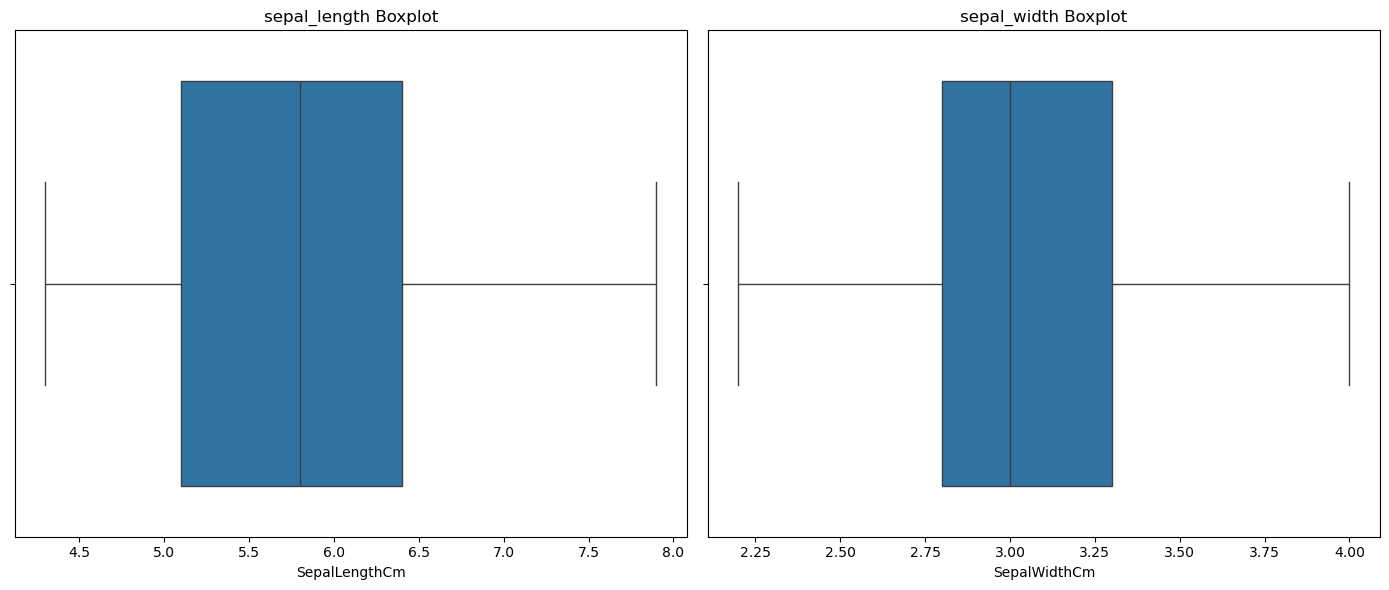

In [111]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

#Plot for salary
plt.subplot(1,2,1)
sns.boxplot(x=df['SepalLengthCm'])
plt.title("sepal_length Boxplot")

#Plot for salary_in_usd
plt.subplot(1,2,2)
sns.boxplot(x=df['SepalWidthCm'])
plt.title("sepal_width Boxplot")


plt.tight_layout()#it Removes overlapping of two subplot
plt.show() #shows boxplot

In [112]:
X = df.drop(['Species'], axis=1)
y = df['Species']

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

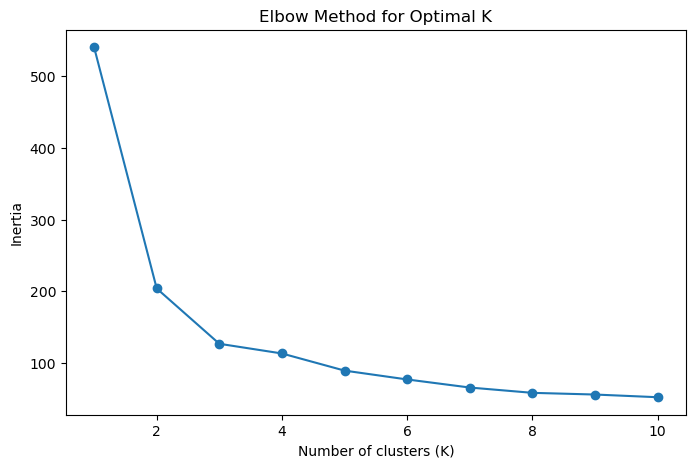

In [115]:
from sklearn.cluster import KMeans
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [116]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)


C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [117]:
y_pred = kmeans.predict(X_test)
y_pred

array([1, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 0,
       2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1,
       2], dtype=int32)

In [123]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [124]:
kmeans.n_clusters

3

In [118]:
mapping = {}

for i in range(kmeans.n_clusters):
    # Get true labels of samples belonging to cluster i
    labels_in_cluster = y_train[kmeans.labels_ == i]

    # If cluster isn't empty, find most common (majority) class
    if len(labels_in_cluster) > 0:
        mapping[i] = pd.Series(labels_in_cluster).mode()[0]

# Convert numeric cluster labels → text labels
y_pred_mapped = [mapping[label] for label in y_pred]

In [119]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
print(" Accuracy:", accuracy_score(y_test, y_pred_mapped))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mapped))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mapped))


 Accuracy: 0.8444444444444444

 Confusion Matrix:
 [[15  0  0]
 [ 0 13  2]
 [ 0  5 10]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.72      0.87      0.79        15
 Iris-virginica       0.83      0.67      0.74        15

       accuracy                           0.84        45
      macro avg       0.85      0.84      0.84        45
   weighted avg       0.85      0.84      0.84        45



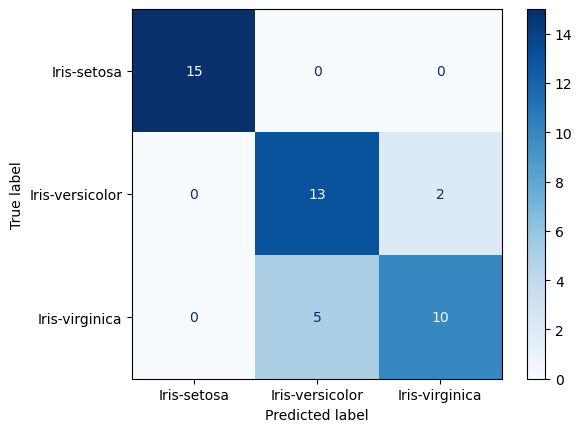

In [120]:
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test, y_pred_mapped)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [121]:
# Train final model with optimal K (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to dataframe
df['Cluster'] = labels

# Display few results
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


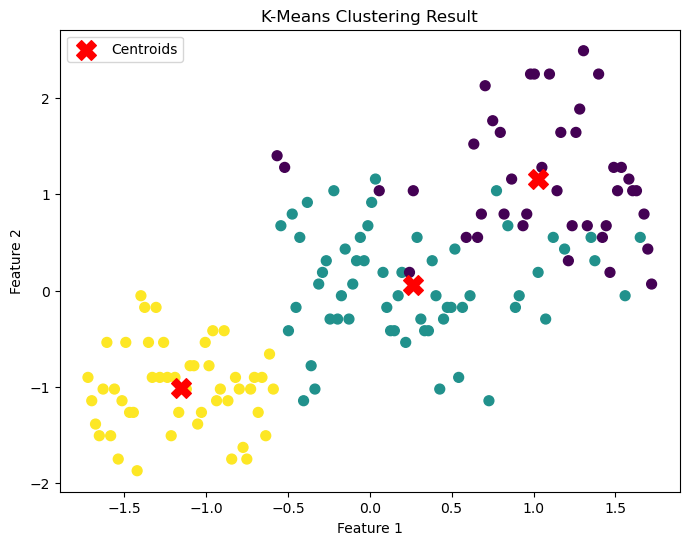

In [122]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
